In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
from mpl_toolkits import mplot3d
from matplotlib import cm

In [13]:
def plot_3d(x, y, p, label= '$z$', elev=30.0, azim=45.0):
    fig = pyplot.figure(figsize=(8.0,6.0))
    ax = mplot3d.Axes3D(fig)
    ax.set_xlabel('$x$')
    ax.set_xlabel('$y$')
    ax.setzlabel(label)
    X, Y = numpy.meshgrid(x,y)
    ax.plot_surface(X,Y,p, cmap=cm.viridis)
    ax.set_xlim(x[0], x[-1])

In [25]:
def analytical_solution(x, y, Lx, Ly):
    X, Y = numpy.meshgrid(x,y)
    u = (numpy.sinh(1.5 * numpy.pi * Y / Ly) *
         numpy.sin(1.5 * numpy.pi * X / Lx) /
         numpy.sinh(1.5 * numpy.pi * Ly / Lx))
    return u

In [26]:
Lx, Ly = 1.0, 1.0
nx, ny = 41, 41

x = numpy.linspace(0.0, Lx, num = nx)
y = numpy.linspace(0.0, Ly, num = ny)



In [35]:
def plot_3d(x,y,u):
    X, Y = numpy.meshgrid(x,y)
    u = (numpy.sinh(1.5 * numpy.pi * Y / Ly) *
         numpy.sin(1.5 * numpy.pi * X / Lx) /
         numpy.sinh(1.5 * numpy.pi * Ly / Lx))
    fig = pyplot.figure(figsize=(8.0,6.0))
    ax = mplot3d.Axes3D(fig)
    ax.plot_surface(X, Y, u, cmap=cm.viridis)
    ax.view_init(elev=30.0, azim=45.0)

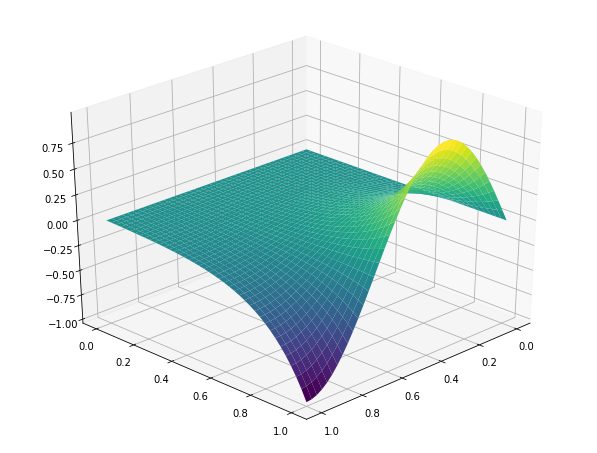

In [36]:
Lx = 1.0
Ly = 1.0
nx = 41
ny = 41

x = numpy.linspace(0.0, Lx, num=nx)
y = numpy.linspace(0.0, Ly, num = ny)

p_exact = analytical_solution(x,y,Lx,Ly)

plot_3d(x,y,p_exact)

In [37]:
def relative_l2_norm(u, u_ref):
    rdiff=(numpy.sqrt(numpy.sum((u-u_ref)**2))/
           numpy.sqrt(numpy.sum(u_ref**2)))
    return rdiff

In [50]:
def laplace2d_jacobi(u0, rtol=1e-6, maxiter=20000):
    u = u0.copy()
    rdiff = rtol + 1.0
    ite = 0
    while rdiff > rtol and ite < maxiter:
        un = u.copy()
        u[1:-1, 1:-1] = 0.25 * (u[:-2, 1:-1] + u[1:-1, :-2] + u[1:-1, 2:] + u[2:, 1:-1])
        u[1:-1, -1] = u[1:-1, -2]
        rdiff = relative_l2_norm(u, un)
        ite += 1
    return u, ite, rdiff
        

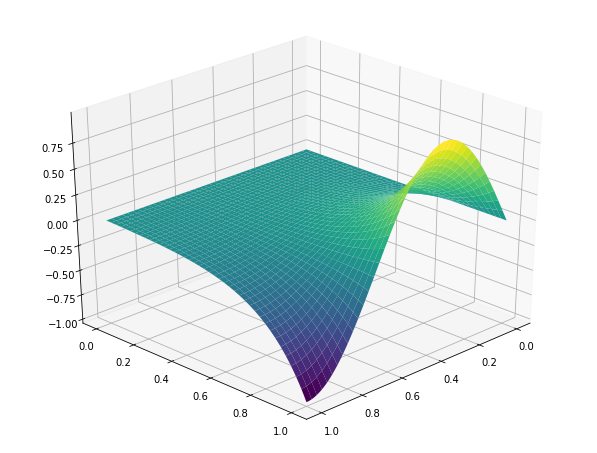

In [54]:
u0 = numpy.zeros((ny, nx))
u0[-1, :] = numpy.sin(1.5*numpy.pi*x/Lx)
plot_3d(x,y,u0)


In [52]:
u, ites, diff = laplace2d_jacobi(u0, rtol=1e-8)

In [53]:
nx_values = [11, 21, 41, 81]
errors = []

for nx in nx_values:
    print(nx)
    x = numpy.linspace(0.0, Lx, num=nx)
    y = x.copy()
    u0 = numpy.zeros((nx,nx))
    u0[-1,:] = numpy.sin(1.5*numpy.pi*x/Lx)
    u = laplace2d_jacobi(u0, rtol=1e-8)[0]
    ua = analytical_solution(x,y,Lx, Lx)
    error = relative_l2_norm(u,ua)
    errors.append(error)

11
21
41
81


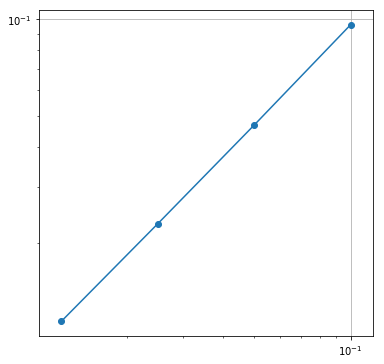

In [55]:
pyplot.figure(figsize=(6,6))
pyplot.grid()
dx_values=[]
for nx in nx_values:
    dx_values.append(Lx / (nx-1))
pyplot.loglog(dx_values, errors, marker='o')
pyplot.axis('equal');

In [56]:
def laplace2d_jacobi_neumann(u0, rtol=1e-6, maxiter=20000):
    u = u0.copy()
    rdiff = rtol + 1.0
    ite = 0
    while rdiff > rtol and ite < maxiter:
        un = u.copy()
        u[1:-1, 1:-1] = 0.25 * (u[:-2, 1:-1] + u[1:-1, :-2] + u[1:-1, 2:] + u[2:, 1:-1])
        #u[1:-1, -1] = u[1:-1, -2]
        
        u[1:-1, -1] = 0.25 * (u[:-2, -1] + 2*u[1:-1, -2] + u[2:,-1])
        rdiff = relative_l2_norm(u, un)
        ite += 1
    return u, ite, rdiff
        

11
21
41
81


ValueError: x and y must have same first dimension, but have shapes (1,) and (4,)

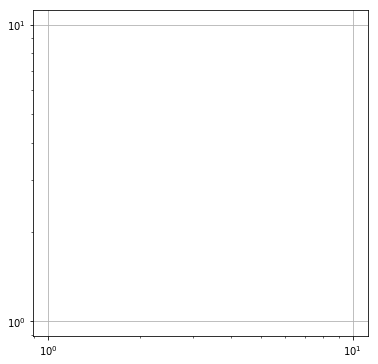

In [57]:
u, ites, diff = laplace2d_jacobi_neumann(u0, rtol=1e-8)
nx_values = [11, 21, 41, 81]
errors = []

for nx in nx_values:
    print(nx)
    x = numpy.linspace(0.0, Lx, num=nx)
    y = x.copy()
    u0 = numpy.zeros((nx,nx))
    u0[-1,:] = numpy.sin(1.5*numpy.pi*x/Lx)
    u = laplace2d_jacobi(u0, rtol=1e-8)[0]
    ua = analytical_solution(x,y,Lx, Lx)
    error = relative_l2_norm(u,ua)
    errors.append(error)
